# Guía 7

## Ejercicio 2

Suponga que un viajante tiene que visitar n ciudades en el menor tiempo posible. Considere una matriz D de tamaño $n × n$ cuyos elementos $d_{pq}$ denotan la distancia entre cada par de ciudades (p, q). Se define un recorrido como una trayectoria cerrada que visita cada ciudad una y s ́olo una vez (a excepción de la ciudad de partida, a la cual debe regresar). El problema consiste en hallar el recorrido de mínima longitud.

Implemente el algoritmo de sistema de hormigas y utilícelo para resolver el problema del agente viajero considerando los datos proporcionados en el archivo gr17.csv.

Analice el efecto de la tasa de evaporación (ρ) y de la cantidad de feromona depositada (τ) sobre los resultados de la búsqueda. Para esto ́ultimo compare el desempeño del algoritmo empleando los métodos global, local y uniforme para depósito de feromonas. Realice varias corridas con cada configuración experimental y considere el tiempo de búsqueda y la longitud de los caminos encontrados como medidas para comparar el desempeño. Construya una tabla comparativa con los resultados obtenidos.



In [19]:
import numpy as np  
import importlib, ACO #borrar
importlib.reload(ACO) #borrar
from ACO import ACO

from prettytable import PrettyTable

G = np.loadtxt("./data/gr17.csv", delimiter=',')

cant_hormigas = 10
tasa_evaporacion = [0.1, 0.5, 0.9]
feromonas_depositadas = [0.1, 1, 10]
metodos = ['global', 'local', 'uniforme']
alpha = 1.0
beta = 1.0
max_it = 400
resultados = PrettyTable(["rho", "q", "metodo", "avg_time", "avg_dist", "avg_it", "last path"])
n_runs = 10

for rho in tasa_evaporacion:
    for q in feromonas_depositadas:
        for metodo in metodos:
            tiempos = []
            dists = []
            caminos = []
            its = []

            for run in range(n_runs):
                aco = ACO(cant_hormigas, rho, q, metodo, alpha, beta, max_it)
                total_time, best_length, best_path, it = aco.buscar(G, 0, 16)

                tiempos.append(total_time)
                dists.append(best_length)
                caminos.append(best_path)
                its.append(it)  
            
            avg_time = np.mean(tiempos)
            avg_dist = np.mean(dists)
            avg_it = np.mean(its)   

            resultados.add_row([rho, q, metodo, f"{avg_time:.4f}", f"{avg_dist:.2f}", f"{avg_it:.2f}", str(caminos[-1])])

print(resultados)
               




+-----+-----+----------+----------+----------+--------+---------------------------------+
| rho |  q  |  metodo  | avg_time | avg_dist | avg_it |            last path            |
+-----+-----+----------+----------+----------+--------+---------------------------------+
| 0.1 | 0.1 |  global  |  0.0189  |  111.40  |  8.30  |  [0, np.int64(6), np.int64(16)] |
| 0.1 | 0.1 |  local   |  0.0203  |  112.60  |  8.60  |  [0, np.int64(6), np.int64(16)] |
| 0.1 | 0.1 | uniforme |  0.0181  |  110.20  |  8.60  |        [0, np.int64(16)]        |
| 0.1 |  1  |  global  |  0.0192  |  116.20  |  8.40  |        [0, np.int64(16)]        |
| 0.1 |  1  |  local   |  0.0187  |  112.60  |  7.90  |  [0, np.int64(6), np.int64(16)] |
| 0.1 |  1  | uniforme |  0.0159  |  113.00  |  8.40  |  [0, np.int64(6), np.int64(16)] |
| 0.1 |  10 |  global  |  0.0175  |  114.20  |  8.00  |  [0, np.int64(6), np.int64(16)] |
| 0.1 |  10 |  local   |  0.0180  |  112.60  |  8.40  |  [0, np.int64(6), np.int64(16)] |
| 0.1 |  1

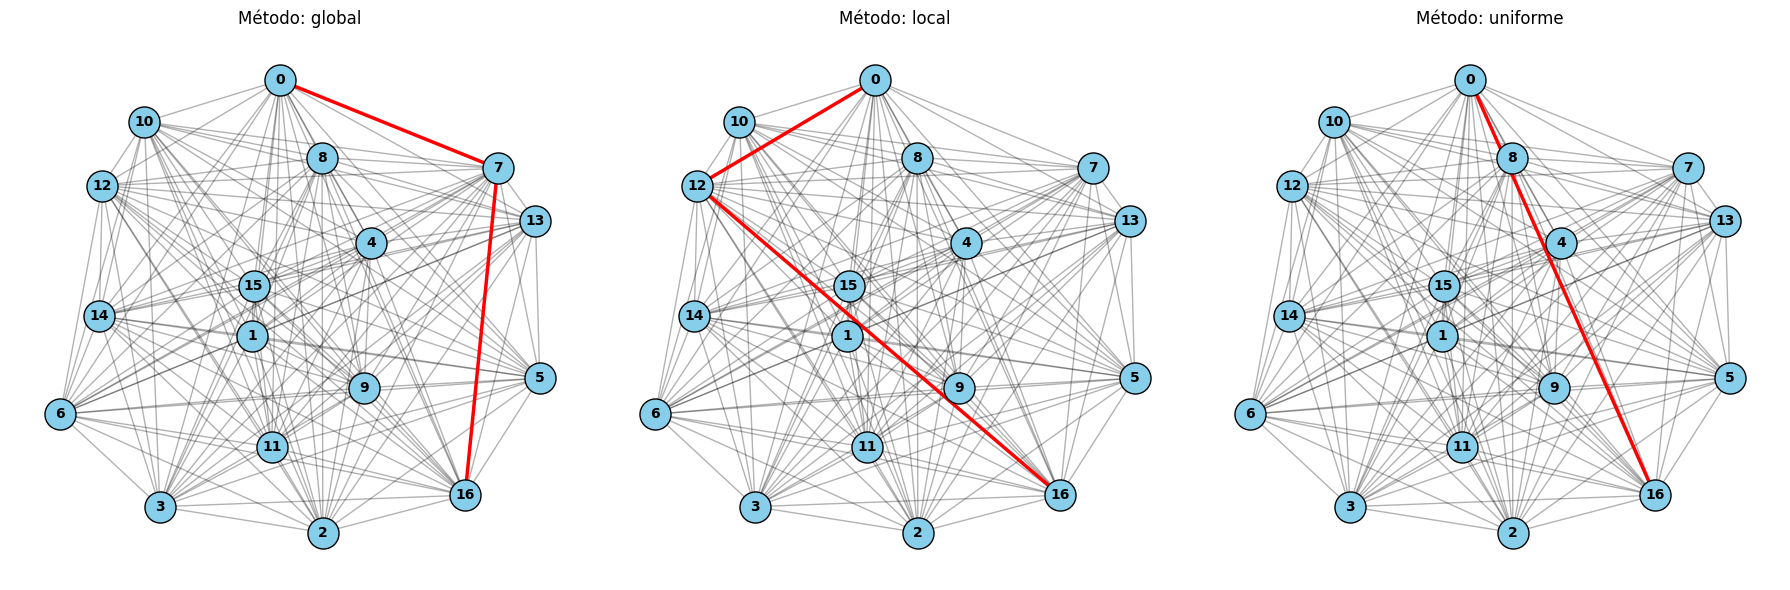

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# construir el grafo base
G_nx = nx.Graph()
for i in range(G.shape[0]):
    for j in range(i + 1, G.shape[1]):
        if G[i, j] > 0:
            G_nx.add_edge(i, j, weight=G[i, j])

# layout fijo para todos los gráficos
pos = nx.spring_layout(G_nx, seed=42)

# graficar cada método
fig, axes = plt.subplots(1, len(metodos), figsize=(6*len(metodos), 6))

if len(metodos) == 1:
    axes = [axes]  # asegurar que sea iterable

for ax, metodo in zip(axes, metodos):
    # tomar el último camino de cada método
    # filtramos caminos que correspondan al método actual
    idx = [i for i, row in enumerate(resultados._rows) if row[2] == metodo]
    if not idx:
        continue
    # usamos el último run para ese método
    best_path = eval(resultados._rows[idx[-1]][-1])  # convertir string a lista

    # convertir a aristas
    edges_in_path = [(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)]

    # dibujar todas las aristas
    nx.draw_networkx_edges(G_nx, pos, ax=ax, alpha=0.3)
    # dibujar camino del ACO
    nx.draw_networkx_edges(G_nx, pos, ax=ax, edgelist=edges_in_path, edge_color='r', width=2.5)
    # nodos
    nx.draw_networkx_nodes(G_nx, pos, ax=ax, node_color='skyblue', node_size=500, edgecolors='k')
    nx.draw_networkx_labels(G_nx, pos, ax=ax, font_size=10, font_weight='bold')
    ax.set_title(f"Método: {metodo}")
    ax.axis('off')

plt.tight_layout()
plt.show()
